In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from genmccd import GenMCCopyDetector
%matplotlib inline

In [2]:
df = pd.read_csv("zipgrade_export_example.csv")

## Initialize model

In [3]:
copy_model = GenMCCopyDetector(df)

## Visualize pairs for which ratio is > 1

<AxesSubplot:>

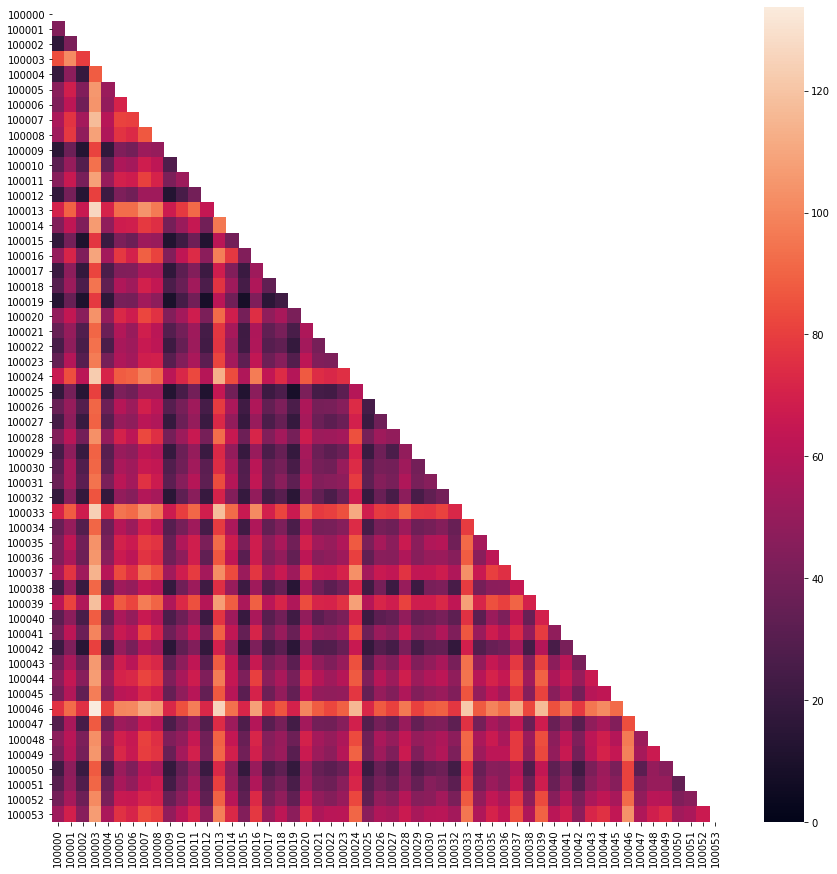

In [4]:
score_df = copy_model.get_copying_logprobs(student_sort_order="id")
plt.figure(figsize=(15,15))
sns.heatmap(score_df, vmin=0)

## Find top pairs

In [5]:
copy_model.print_top_scores(n=10)

133.80585 Dodie Dinwoodie      Ute Unga            
126.63111 Dodie Dinwoodie      Norene Nold         
125.56495 Norene Nold          Ute Unga            
123.90256 Dodie Dinwoodie      Hortencia Haltiwanger
122.66741 Dodie Dinwoodie      Yi Yurko            
121.69682 Hortencia Haltiwanger Ute Unga            
118.30578 Dodie Dinwoodie      Neoma Nevala        
117.95705 Norene Nold          Hortencia Haltiwanger
117.28552 Dodie Dinwoodie      Howard Heagany      
116.85433 Neoma Nevala         Ute Unga            


## Visualize graph

In [6]:
G = copy_model.get_graph(threshold=5)

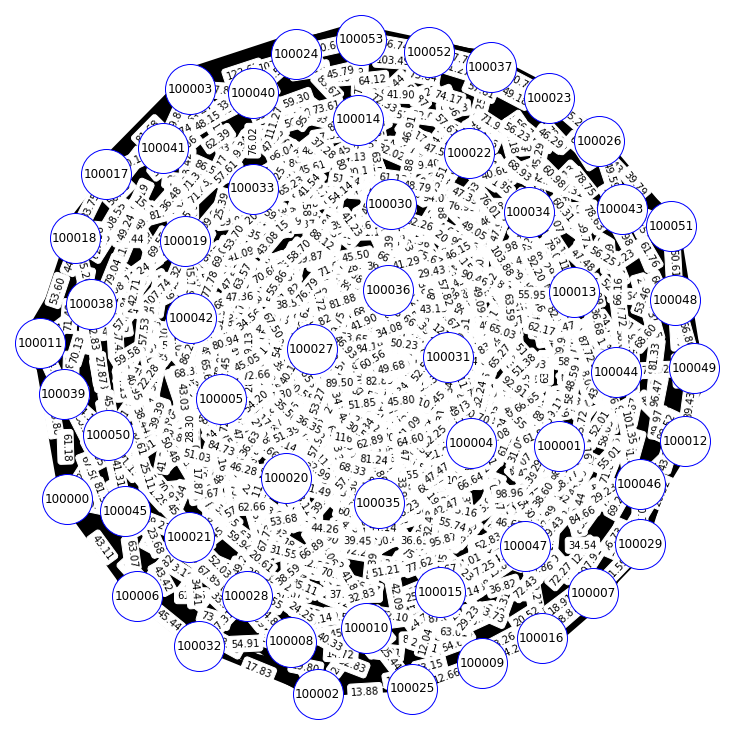

In [7]:
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout as layout

options = {"with_labels": True, "node_color": "white", 
           "edgecolors": "blue", "node_size": 2500}
pos = layout(G, prog="neato")

plt.figure(figsize=(10,10))
nx.draw(G, pos=pos, **options)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edges(G, pos, width=[x/3 for x in labels.values()])
nx.draw_networkx_edge_labels(G, pos, edge_labels={x:f"{y:2.2f}" for x, y in labels.items()})
plt.show()